# **Ballistic simulation**
## Required libraries

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math
from vpython import *

<IPython.core.display.Javascript object>

In [30]:
#EULER-RICHARDSON METHOD ---- 2 Dimensional

def dragModelER(vLaunch,theta,vWind):
    #steps
    N = 12000

    #define delta T and constants
    timeTaken = 1000
    deltaT = timeTaken/N
    g = 10
    uT = 100

    #create empty arrays with initial conditions
    Z = np.ones(N)
    X = np.zeros(N)
    T = np.zeros(N)
    Vz = np.zeros(N)
    Vx = np.zeros(N)

    X[0] = 0
    Vx[0] = vLaunch*np.cos(math.radians(theta))
    Z[0] = 0
    Vz[0] = vLaunch*np.sin(math.radians(theta))
    T[0] = 0
    i = 0

    #index arrays
    while (Z[i] >= 0):
        i = i + 1
        T[i]  = i*deltaT
        ax =  -(g/uT**2)*((Vx[i-1] - vWind)**2 + Vz[i-1]**2)**(1/2)*(Vx[i-1] - vWind)
        az =  -(g + (g/uT**2)*((Vx[i-1] - vWind)**2 + Vz[i-1]**2)**(1/2)*Vz[i-1])
        vxMid = Vx[i-1] + 0.5*deltaT*ax
        vzMid = Vz[i-1] + 0.5*deltaT*az
        axMid = -(g/uT**2)*((vxMid - vWind)**2 + vzMid**2)**(1/2)*(vxMid - vWind)
        azMid = -(g + (g/uT**2)*((vxMid - vWind)**2 + vzMid**2)**(1/2)*vzMid)
        X[i] = X[i-1] + vxMid*deltaT
        Z[i] = Z[i-1] + vzMid*deltaT
        Vx[i] = Vx[i-1] + axMid*deltaT
        Vz[i] = Vz[i-1] + azMid*deltaT
    return T, Vx, Vz, Z, X, i

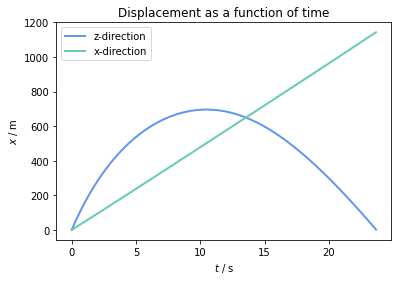

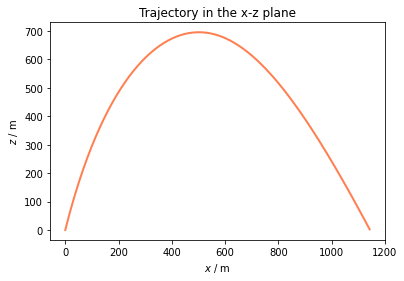

In [31]:
#call function and reassign arrays
T, Vx, Vz, Z, X, i = dragModelER(180,75,50)

#generate plot
plt.xlabel(r'$t$ / s')
plt.ylabel(r'$z$ / m')
plt.plot(T[0:i], Z[0:i], c="cornflowerblue", label="z-direction", linewidth=2)

plt.xlabel(r'$t$ / s')
plt.ylabel(r'$x$ / m')
plt.title('Displacement as a function of time')
plt.plot(T[0:i], X[0:i], c="mediumaquamarine", label="x-direction", linewidth=2)
plt.legend()
plt.show()


plt.xlabel(r'$x$ / m')
plt.ylabel(r'$z$ / m')
plt.title('Trajectory in the x-z plane')
plt.plot(X[0:i], Z[0:i], c="coral", linewidth=2)
plt.show()

In [93]:
T, Vx, Vz, Z, X, i = dragModelER(400,65,20)

scene = canvas(autoscale = True, title="Projectile Motion", width=1000, height=1000, center=vector(0,0,0), background=color.white, forward=vector(0,1,0), up=vector(0,0,1))

ground = box(pos=vector(0,0,-1050), size=vector(2000,2000,10), color=color.cyan)

projectile = sphere(canvas = scene, pos=vector(-1000,0,-1000), radius=50, color=color.red, make_trail=True)

for j in range(0,i):
    rate(50)
    projectile.pos.x = X[j] - 1000
    projectile.pos.z = Z[j] - 1000

projectile.visible = False
del projectile 
    


<IPython.core.display.Javascript object>